#### Life cycle of the project:
 - Data Analysis
 - Feature Engineering
 - Feature Selection
 - Model Building
 - Model Deployment

In this we are going to just Explore data. i.e, Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/user/House prediction/train.csv")

In [3]:
df.shape

(1460, 81)

In [4]:
#the dataset has 1460 rows and 81 columns
pd.set_option("display.max_columns",None)
#to display all columns

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Exploratory Data Analysis

##### In Data Analysis we will Analyze to find the below stuff:
 - Missing values
 - All the numerical variables
 - Distribution of the numerical variables
 - Categorical variables
 - Cardinality of categorical variables
 - Outliers
 - Relationship between dependent and indepedent variables


In [6]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
# lets display in more understanding way
features_with_na = [feature for feature in df.columns if df[feature].isnull().sum() > 0]
for feature in features_with_na:
    print(feature , np.round((df[feature].isnull().mean())*100,4), "% missing values")

LotFrontage 17.7397 % missing values
Alley 93.7671 % missing values
MasVnrType 0.5479 % missing values
MasVnrArea 0.5479 % missing values
BsmtQual 2.5342 % missing values
BsmtCond 2.5342 % missing values
BsmtExposure 2.6027 % missing values
BsmtFinType1 2.5342 % missing values
BsmtFinType2 2.6027 % missing values
Electrical 0.0685 % missing values
FireplaceQu 47.2603 % missing values
GarageType 5.5479 % missing values
GarageYrBlt 5.5479 % missing values
GarageFinish 5.5479 % missing values
GarageQual 5.5479 % missing values
GarageCond 5.5479 % missing values
PoolQC 99.5205 % missing values
Fence 80.7534 % missing values
MiscFeature 96.3014 % missing values


In [8]:
len(features_with_na)
#so we have 19 columns which contains null values

19

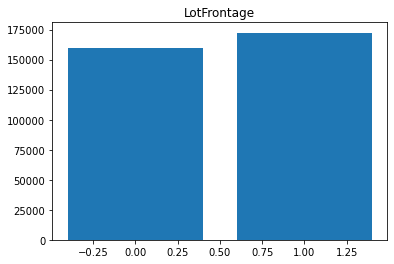

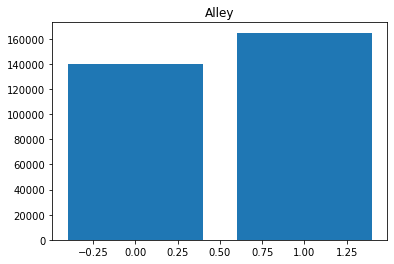

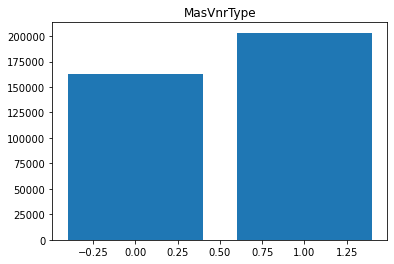

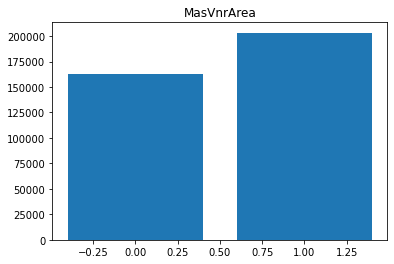

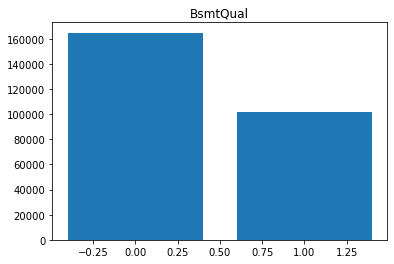

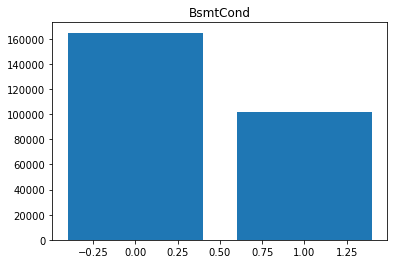

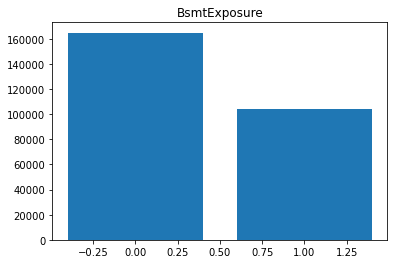

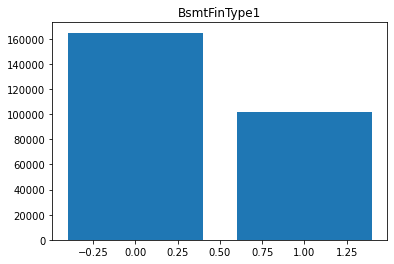

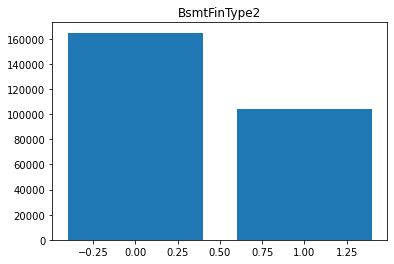

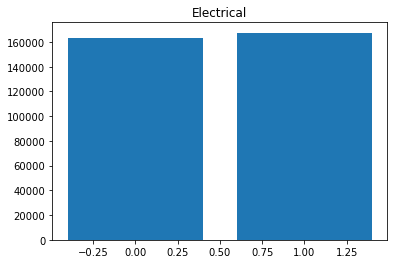

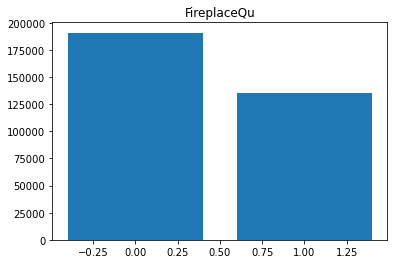

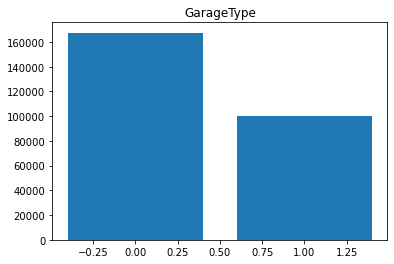

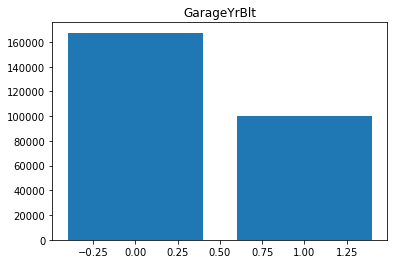

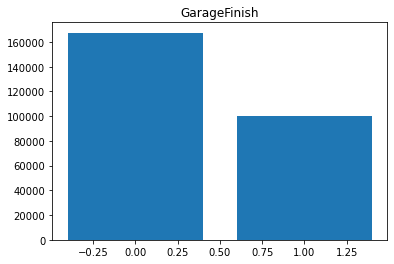

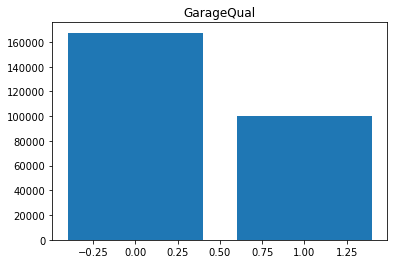

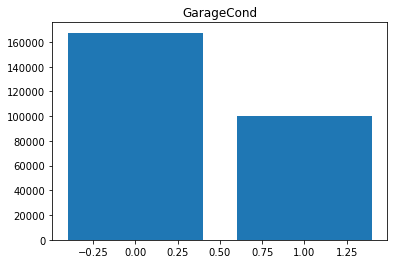

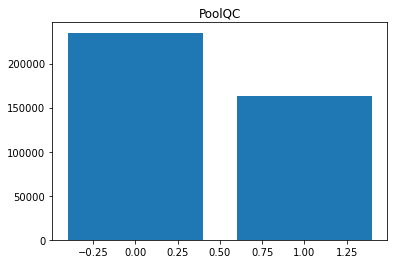

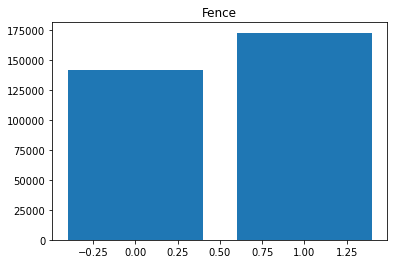

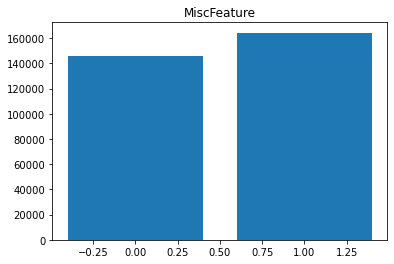

In [9]:
#lets find out if the missing value are important by looking into the relation between 
# missing value and SalePrice(Dependent variable), 

for feature in features_with_na:
    data = df.copy()
    data[feature] = np.where(data[feature].isnull(),1,0)
    a = pd.DataFrame(data.groupby(feature)["SalePrice"].median())
    a = a.reset_index()
    x = a[feature]
    y = a["SalePrice"]
    plt.bar(x,y)
    plt.title(feature)
    plt.show()
   

observation: 

here we can see the relation between missing value and dependent variable

so we have to replace the missing value with meaningfull data

In [10]:
# lets find out Numerical features

num_features = [feature for feature in df.columns if df[feature].dtype != "O"]
print("no of num_features: ",len(num_features))
df[num_features].head()

no of num_features:  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


##### Temporary variables: (eg: Datetime variables)

In [11]:
#lets find out if we have date time varible\
#by looking into data set 4 year features lets extract them

yr_features = [feature for feature in df.columns if "Year" in feature or "Yr" in feature]

df[yr_features].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


In [12]:
for feature in yr_features:
    print(feature)
    print(df[feature].unique())


YearBuilt
[2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd
[2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt
[2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

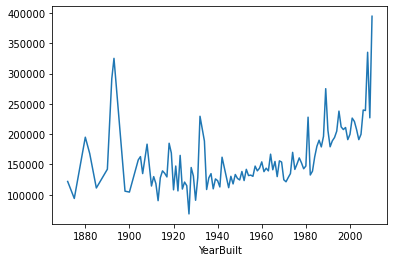

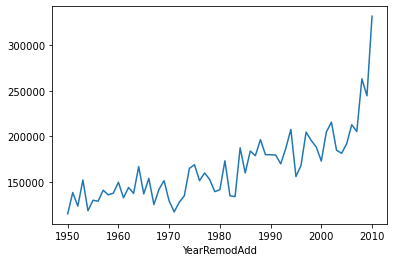

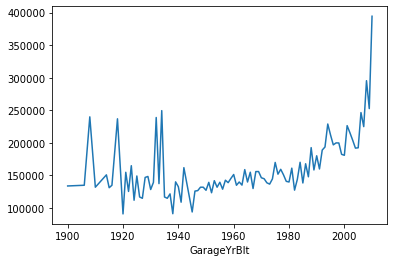

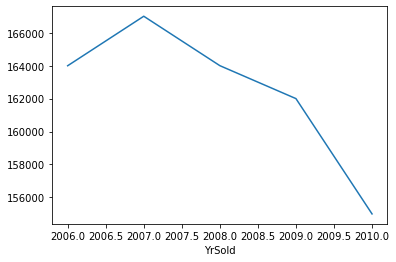

In [13]:
for feature in yr_features:
    data.groupby(feature)["SalePrice"].median().plot()
    plt.show()
    

Obeservation:

i can see as in the feature yrsold the saleprice is decreasing

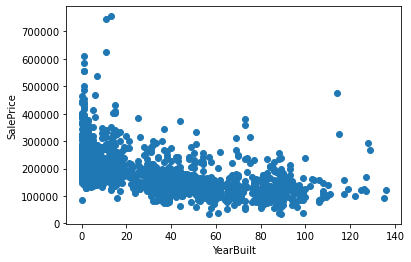

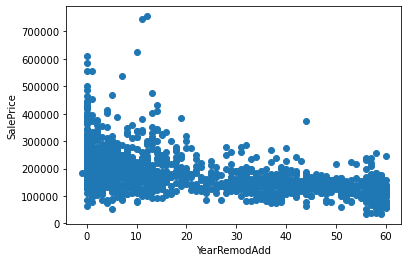

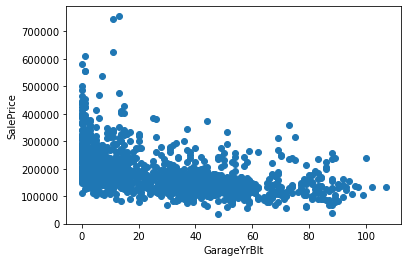

In [14]:
for feature in yr_features:
    if feature != "YrSold":
        data = df.copy()
        data[feature] = data["YrSold"] - data[feature]
        plt.scatter(data[feature],data["SalePrice"])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

In [28]:
#Numerical variables is of 2 types
#continous variables or discrete variables

dscrt_features = [feature for feature in num_features if len(df[feature].unique()) <25 and feature not in yr_features+["Id"]]

for feature in dscrt_features:
    print("{} : {} no of categories".format(feature,len(df[feature].unique())))

MSSubClass : 15 no of categories
OverallQual : 10 no of categories
OverallCond : 9 no of categories
LowQualFinSF : 24 no of categories
BsmtFullBath : 4 no of categories
BsmtHalfBath : 3 no of categories
FullBath : 4 no of categories
HalfBath : 3 no of categories
BedroomAbvGr : 8 no of categories
KitchenAbvGr : 4 no of categories
TotRmsAbvGrd : 12 no of categories
Fireplaces : 4 no of categories
GarageCars : 5 no of categories
3SsnPorch : 20 no of categories
PoolArea : 8 no of categories
MiscVal : 21 no of categories
MoSold : 12 no of categories


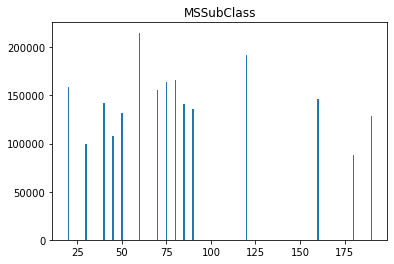

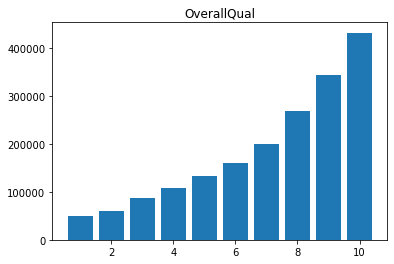

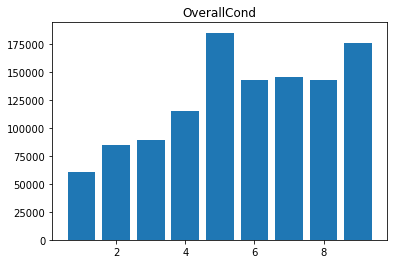

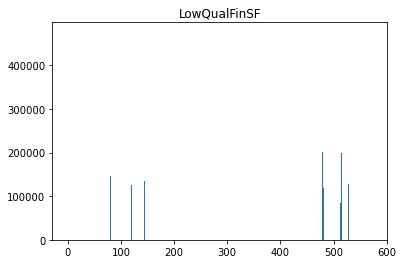

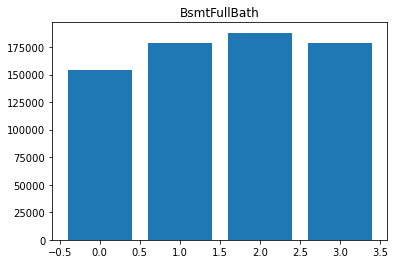

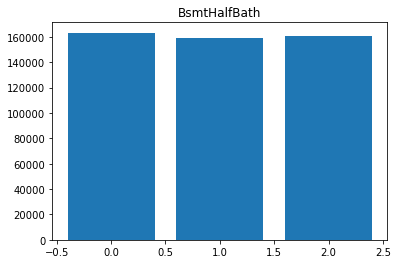

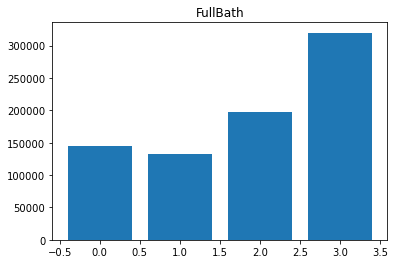

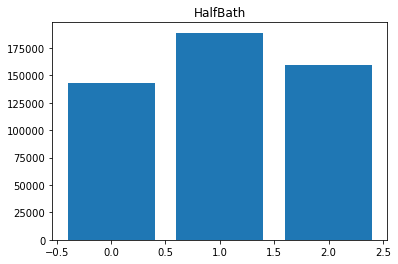

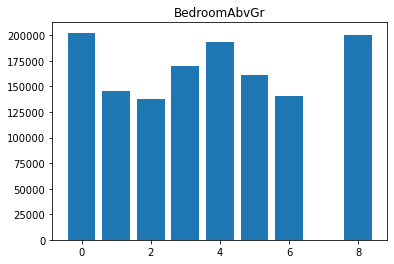

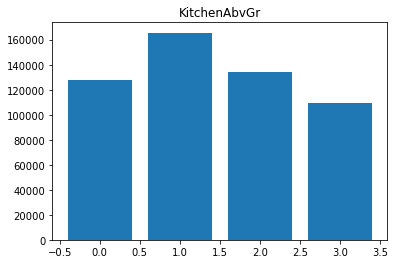

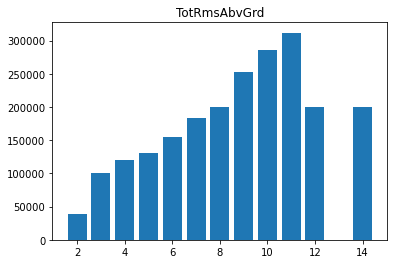

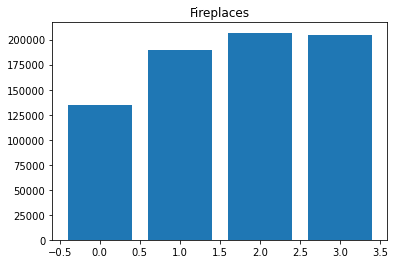

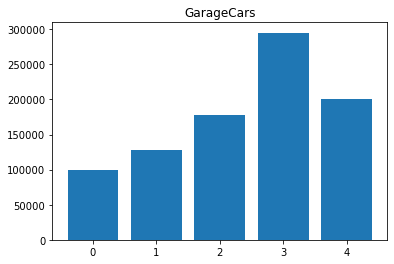

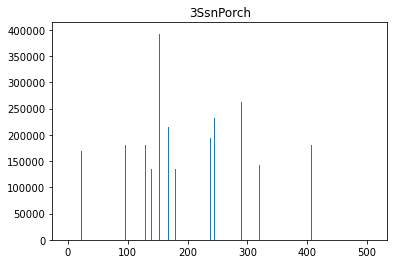

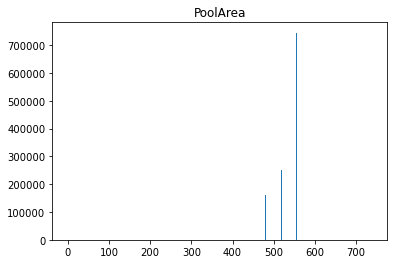

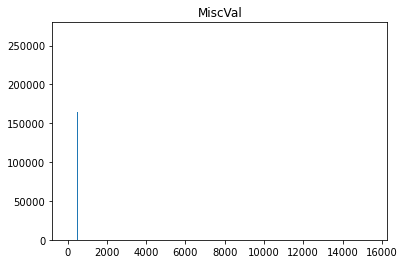

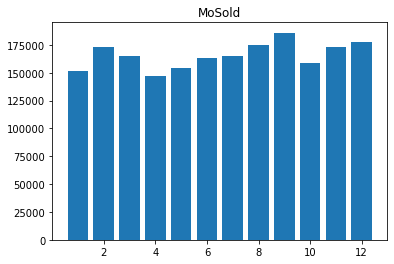

In [16]:
for feature in dscrt_features:
    data = df.copy()
    a = pd.DataFrame(data.groupby(feature)["SalePrice"].median())
    a = a.reset_index()
    plt.bar(a[feature],a["SalePrice"])
    plt.title(feature)
    plt.show()

In [36]:
contns_features = [feature for feature in num_features if feature not in dscrt_features+yr_features+["Id"]]
print("the count of continous features are {}".format(len(contns_features)))
df[contns_features].sample(5)

the count of continous features are 16


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
1289,86.0,11065,788.0,0,0,1085,1085,1120,850,1970,753,177,74,0,0,281000
247,75.0,11310,0.0,0,0,1367,1367,1375,0,1375,451,0,30,0,0,140000
343,63.0,8849,616.0,28,0,1656,1684,1684,0,1684,564,495,72,0,0,266000
1332,67.0,8877,0.0,690,0,126,816,816,0,816,288,0,0,0,0,100000
387,72.0,7200,255.0,631,0,410,1041,1125,0,1125,352,296,0,0,0,125000


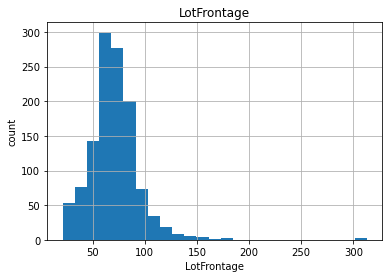

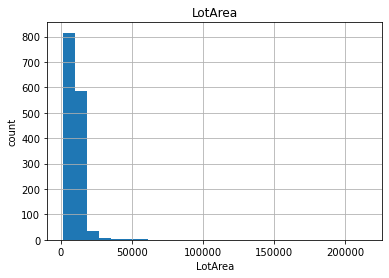

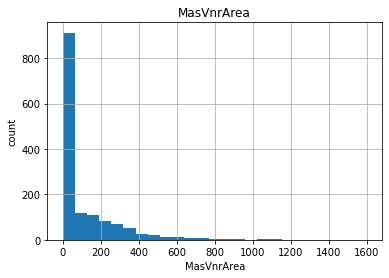

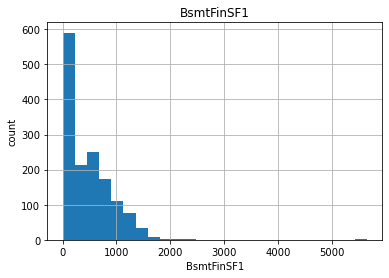

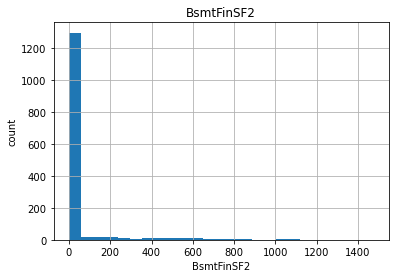

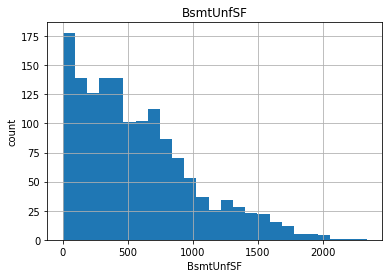

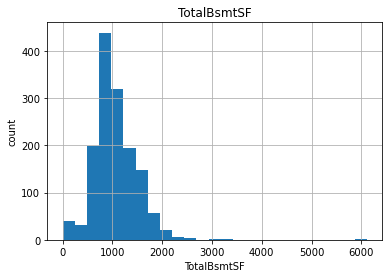

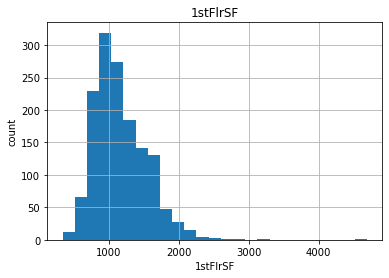

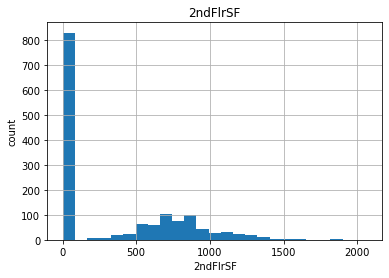

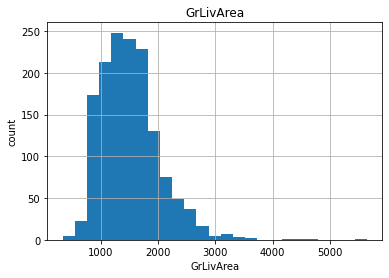

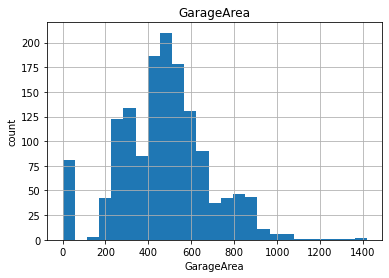

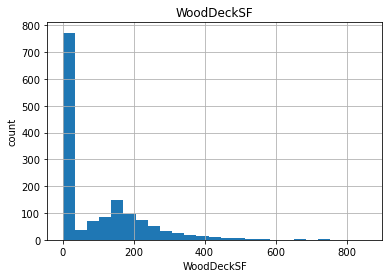

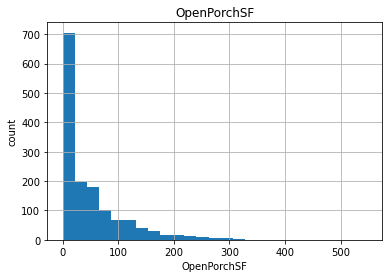

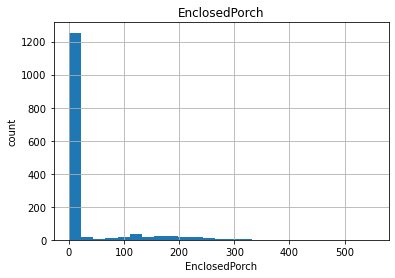

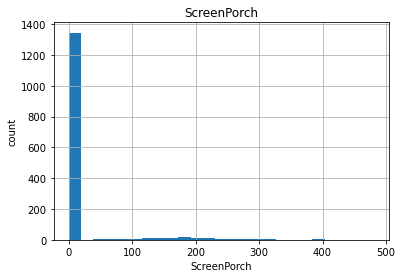

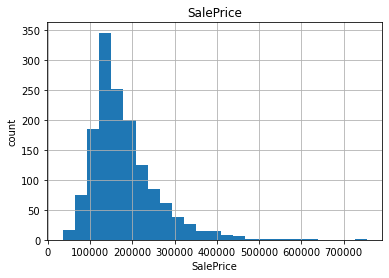

In [18]:
for feature in contns_features:
    data = df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()

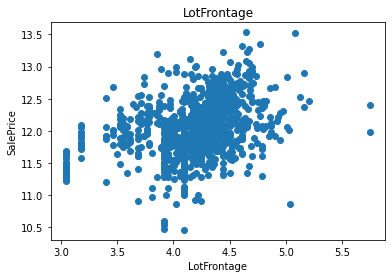

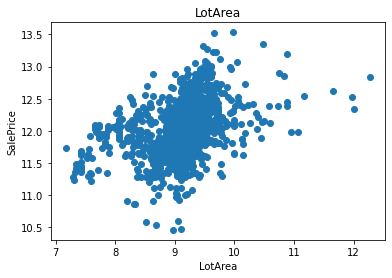

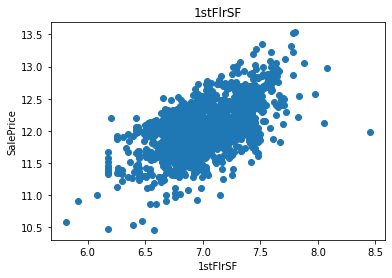

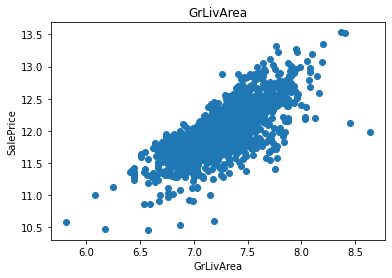

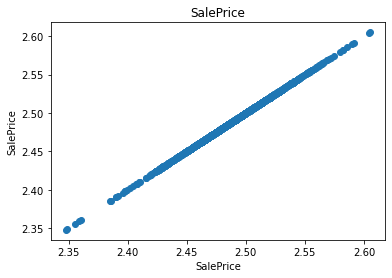

In [19]:
#  I will be performing logarithmic transformation

for feature in contns_features:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data["SalePrice"] = np.log(data["SalePrice"])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel("SalePrice")
        plt.title(feature)
        plt.show()

Observation:
as i can see after applying log the data is looking good

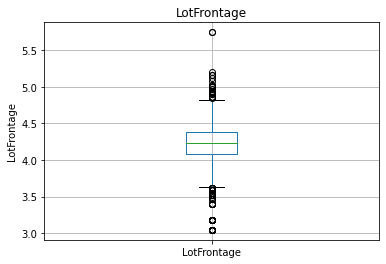

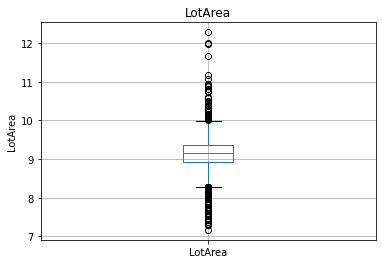

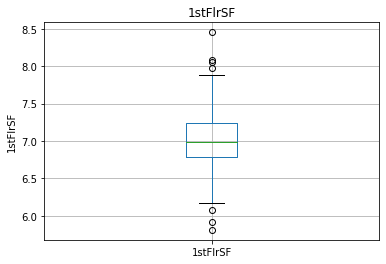

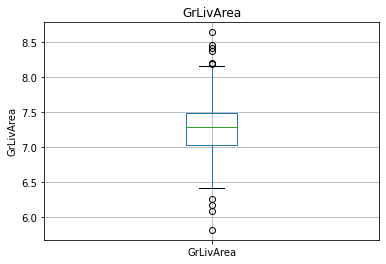

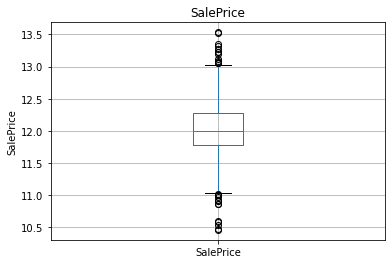

In [20]:
#I will check for out liers now using box plot

for feature in contns_features:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data.boxplot(feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [21]:
# Lets find out categorical features now

cat_features = [feature for feature in df.columns if df[feature].dtypes == "O"]
cat_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [22]:
# now lets check the categories in the cat_features
for feature in cat_features:
    print("{} : {} no of categories".format(feature,len(df[feature].unique())))

MSZoning : 5 no of categories
Street : 2 no of categories
Alley : 3 no of categories
LotShape : 4 no of categories
LandContour : 4 no of categories
Utilities : 2 no of categories
LotConfig : 5 no of categories
LandSlope : 3 no of categories
Neighborhood : 25 no of categories
Condition1 : 9 no of categories
Condition2 : 8 no of categories
BldgType : 5 no of categories
HouseStyle : 8 no of categories
RoofStyle : 6 no of categories
RoofMatl : 8 no of categories
Exterior1st : 15 no of categories
Exterior2nd : 16 no of categories
MasVnrType : 5 no of categories
ExterQual : 4 no of categories
ExterCond : 5 no of categories
Foundation : 6 no of categories
BsmtQual : 5 no of categories
BsmtCond : 5 no of categories
BsmtExposure : 5 no of categories
BsmtFinType1 : 7 no of categories
BsmtFinType2 : 7 no of categories
Heating : 6 no of categories
HeatingQC : 5 no of categories
CentralAir : 2 no of categories
Electrical : 6 no of categories
KitchenQual : 4 no of categories
Functional : 7 no of cat

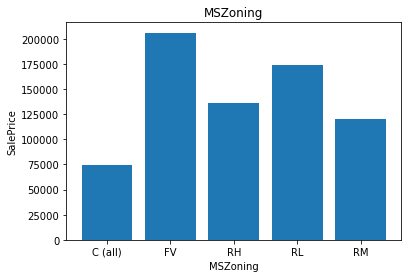

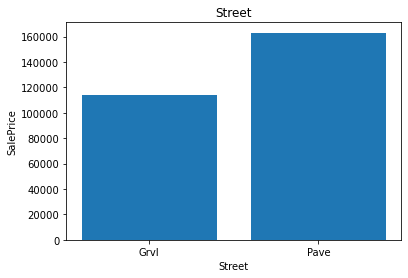

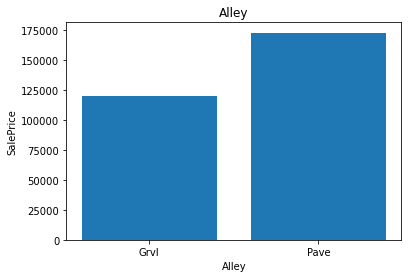

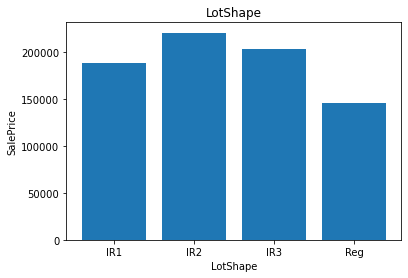

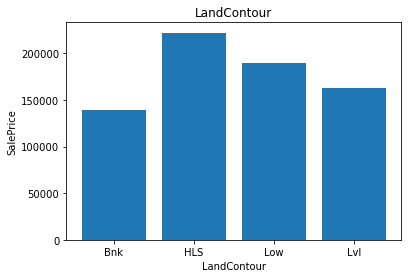

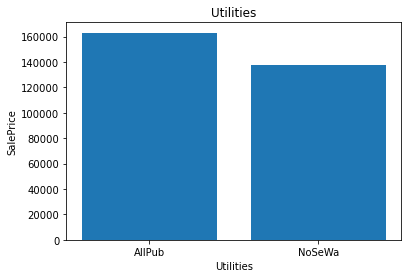

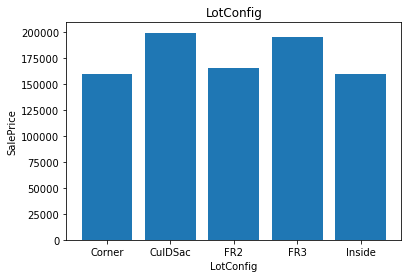

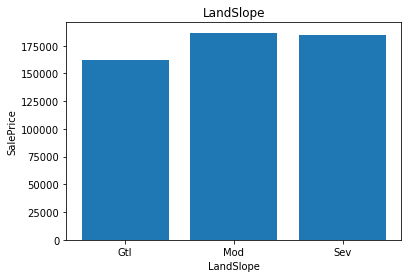

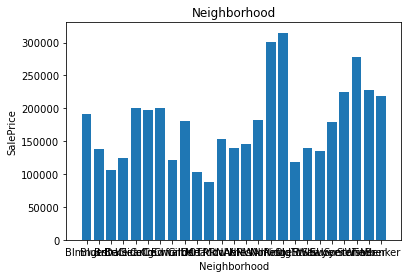

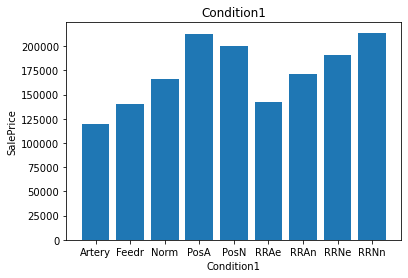

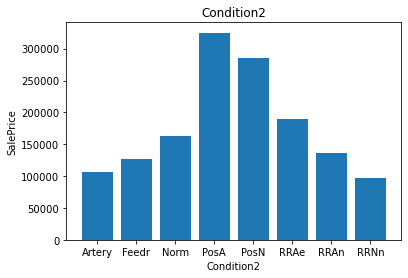

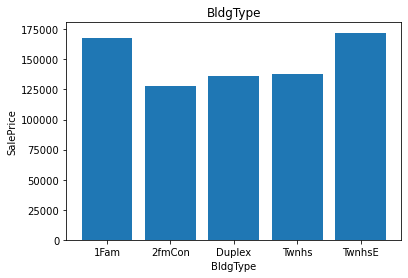

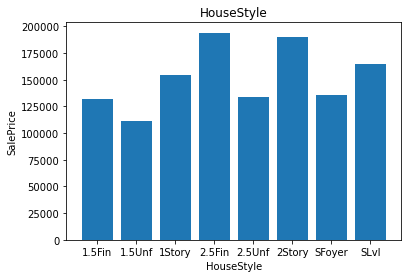

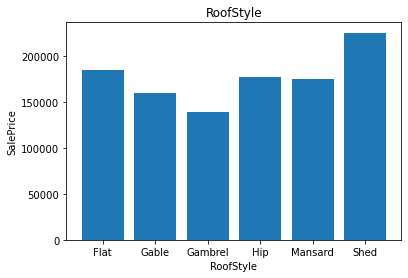

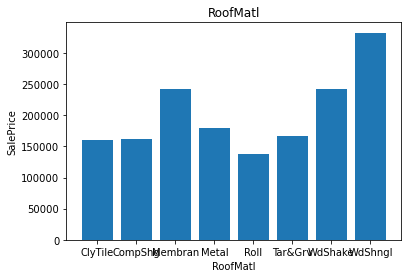

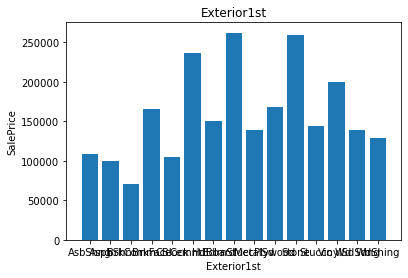

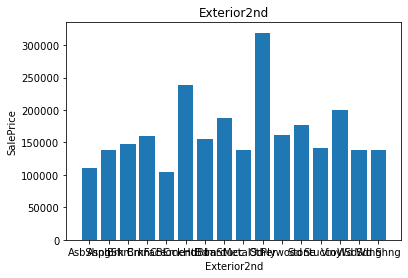

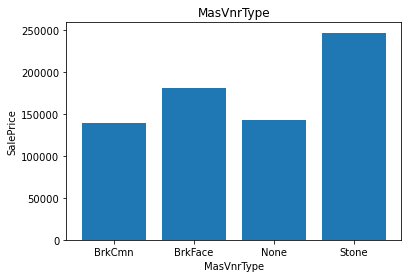

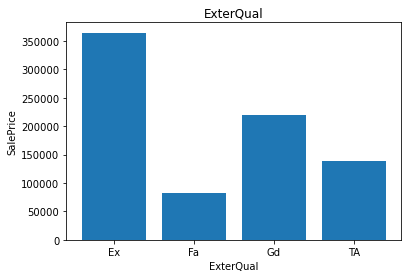

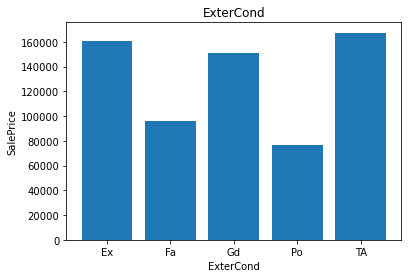

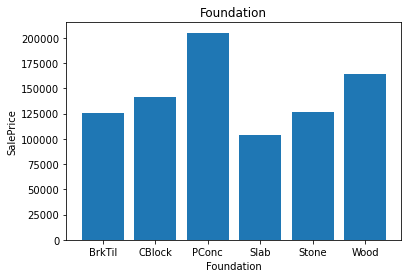

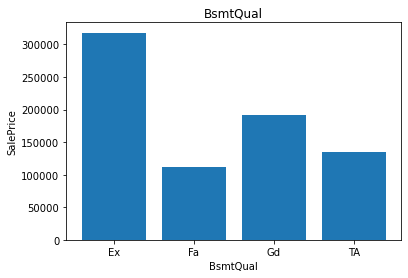

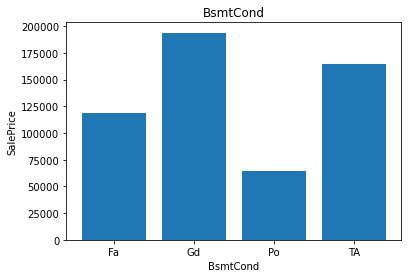

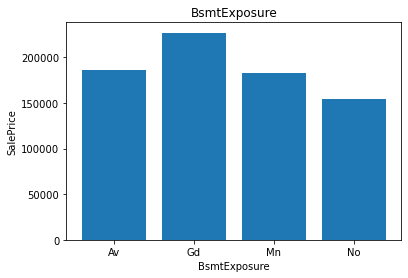

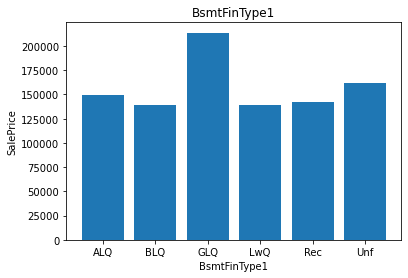

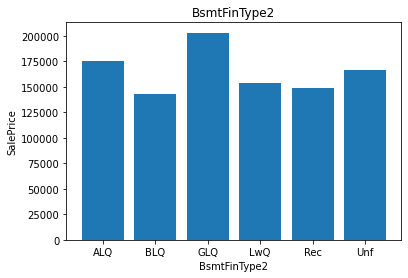

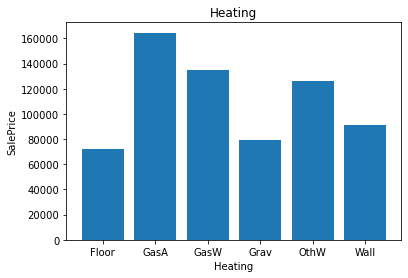

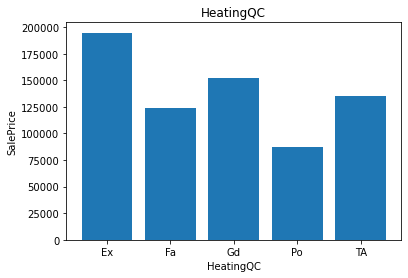

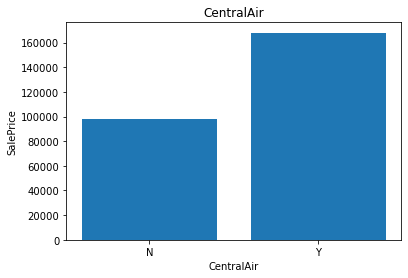

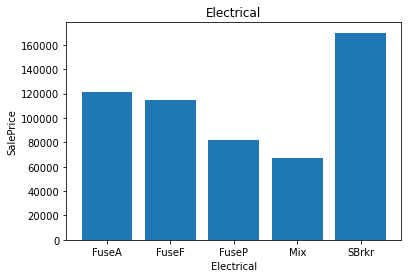

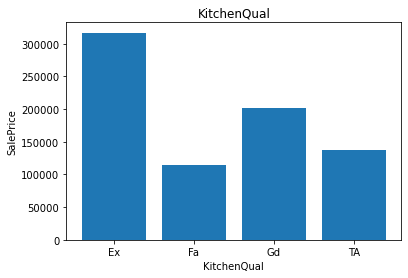

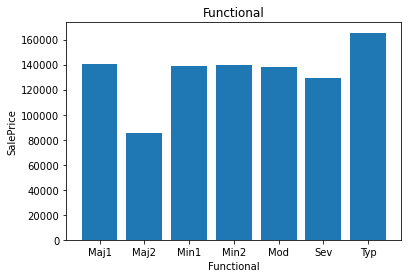

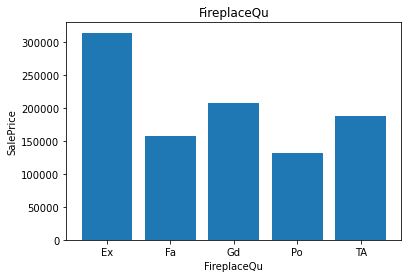

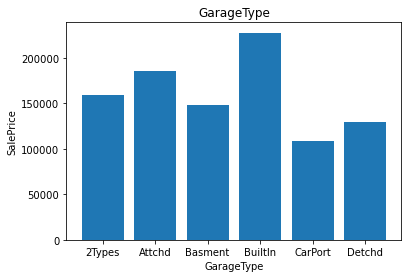

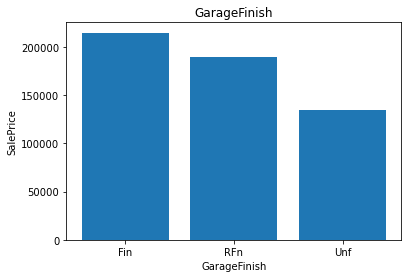

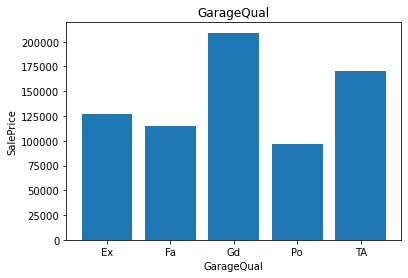

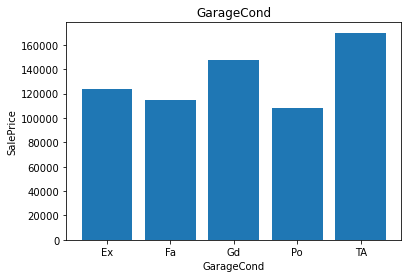

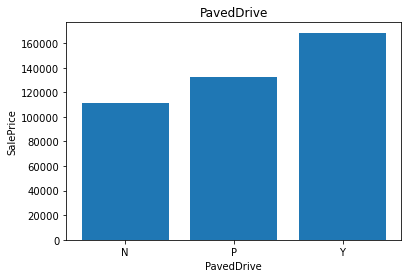

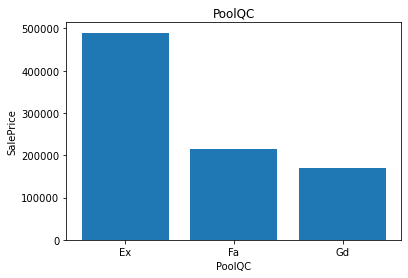

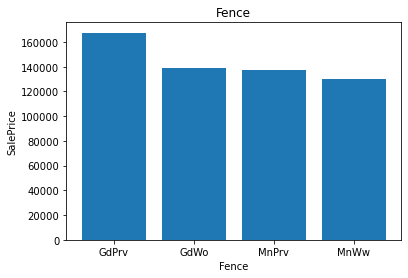

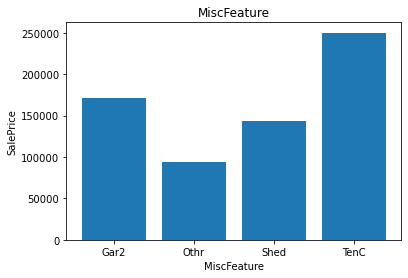

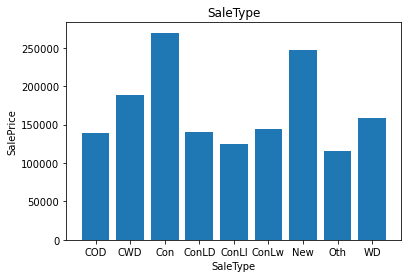

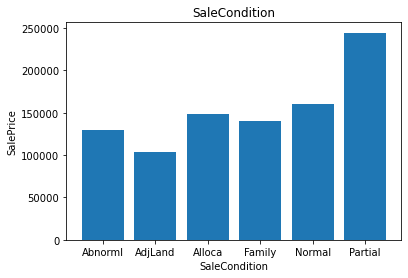

In [23]:
#Lets visualize the categorical data now

for feature in cat_features:
    data = df.copy()
    a = pd.DataFrame(data.groupby(feature)["SalePrice"].median())
    a = a.reset_index()
    x = a[feature]
    y = a["SalePrice"]
    plt.bar(x,y)
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.title(feature)
    plt.show()